# Imported Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model #GARCH Models
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import math
from statistics import NormalDist
from scipy.stats import t
from datetime import datetime
from scipy.stats import shapiro #Shapiro Test
from scipy import stats #t-test
import statsmodels.api as sm #Ljung-Box Test
from scipy.stats import chi2

# Data

In [2]:
start_date = '2006-01-01' #yyyy-mm-dd
end_date = '2022-01-01'


#Philippines
PH = pd.read_csv('https://raw.githubusercontent.com/raphaelyt/thesis199.11/main/data/2006-2021/PSEi.csv')
PH['Date'] = pd.to_datetime(PH['Date'])
PH = PH.rename(columns={'Price': 'Close'})
PH = PH.replace(',','', regex=True)
PH['Close'] = PH['Close'].astype(float, errors = 'raise')
mask = (PH['Date'] >= start_date) & (PH['Date'] <= end_date)
PH = PH.loc[mask]
PH = PH.set_index('Date')
PH = PH.sort_index(axis=0, ascending = False)

#Malaysia
MY = pd.read_csv('https://raw.githubusercontent.com/raphaelyt/thesis199.11/main/data/2006-2021/%5EKLSE.csv')
MY['Date'] = pd.to_datetime(MY['Date'])
MY = MY.rename(columns={'Price': 'Close'})
MY = MY.replace(',','', regex=True)
MY['Close'] = MY['Close'].astype(float, errors = 'raise')
mask = (MY['Date'] >= start_date) & (MY['Date'] <= end_date)
MY = MY.loc[mask]
MY = MY.set_index('Date')
MY = MY.sort_index(axis=0, ascending = False).dropna()

#Signapore
SG = pd.read_csv('https://raw.githubusercontent.com/raphaelyt/thesis199.11/main/data/2006-2021/STI.csv')
SG['Date'] = pd.to_datetime(SG['Date'])
SG = SG.replace(',','', regex=True)
SG['Close'] = SG['Close'].astype(float, errors = 'raise')
mask = (SG['Date'] >= start_date) & (SG['Date'] <= end_date)
SG = SG.loc[mask]
SG= SG.set_index('Date')
SG = SG.sort_index(axis=0, ascending = False).dropna()

#Thailand
TH = pd.read_csv('https://raw.githubusercontent.com/raphaelyt/thesis199.11/main/data/2006-2021/SETi.csv')
TH['Date'] = pd.to_datetime(TH['Date'])
TH = TH.rename(columns={'Price': 'Close'})
TH = TH.replace(',','', regex=True)
TH['Close'] = TH['Close'].astype(float, errors = 'raise')
mask = (TH['Date'] >= start_date) & (TH['Date'] <= end_date)
TH = TH.loc[mask]
TH= TH.set_index('Date')
TH = TH.sort_index(axis=0, ascending = False).dropna()

#Vietnam
VT = pd.read_csv('https://raw.githubusercontent.com/raphaelyt/thesis199.11/main/data/2006-2021/HNX.csv')
VT['Date'] = pd.to_datetime(VT['Date'])
VT = VT.rename(columns={'Price': 'Close'})
VT = VT.replace(',','', regex=True)
VT['Close'] = VT['Close'].astype(float, errors = 'raise')
mask = (VT['Date'] >= start_date) & (VT['Date'] <= end_date)
VT = VT.loc[mask]
VT= VT.set_index('Date')
VT = VT.sort_index(axis=0, ascending = False).dropna()

# Logarithmic Returns

In [3]:
def get_returns(df,d):
    '''
    The function obtains the log returns of the asset shifted d days
    
    PARAMETERS
    ----------
    df : pandas.DataFrame
        The data frame contains data of a chosen stock index 
        (Stock index must be arrange in DESCENDING ORDER by DATE)
    d : int
        The dth day being forecast
        (Assumed to be 1 for most cases)
        
    RETURNS
    -------
    df : pandas.DataFrame
        The data frame returns an updated data frame containing the
        'Returns' column
    '''
    df['Previous'] = df['Close'].shift(-d)
    df['Returns'] = np.log(df['Close']/df['Previous'])*100
    display(df.head(5))
    return df

PH = get_returns(PH, 1)
MY = get_returns(MY, 1)
SG = get_returns(SG, 1)
TH = get_returns(TH, 1)
VT = get_returns(VT, 1)

,Open,High,Low,Close,Unnamed: 5,Unnamed: 6,Previous,Returns
Date,,,,,,,,
2021-12-31,7274.69,7274.69,7119.44,7122.63,NaN,NaN,7334.56,-2.932038
2021-12-29,7277.08,7334.56,7237.01,7334.56,NaN,NaN,7286.50,0.657410
2021-12-28,7239.78,7288.58,7239.78,7286.50,NaN,NaN,7254.80,0.436000
2021-12-27,7184.88,7254.80,7166.93,7254.80,NaN,NaN,7181.86,1.010492
2021-12-24,7257.72,7257.72,7181.86,7181.86,NaN,NaN,7248.05,-0.917406


,Open,High,Low,Close,Previous,Returns
Date,,,,,,
2021-12-31,1567.53,1567.53,1567.53,1567.53,1543.61,1.537730
2021-12-30,1543.61,1543.61,1543.61,1543.61,1545.04,-0.092597
2021-12-29,1545.04,1545.04,1545.04,1545.04,1539.89,0.333881
2021-12-28,1539.89,1539.89,1539.89,1539.89,1533.91,0.389095
2021-12-27,1533.91,1533.91,1533.91,1533.91,1516.45,1.144795


,Open,High,Low,Close,Previous,Returns
Date,,,,,,
2021-12-31,3127.11,3139.74,3123.68,3123.68,3126.64,-0.094715
2021-12-30,3132.36,3137.86,3126.55,3126.64,3138.02,-0.363308
2021-12-29,3135.39,3140.52,3132.87,3138.02,3128.41,0.306714
2021-12-28,3110.82,3128.92,3108.93,3128.41,3104.24,0.775597
2021-12-27,3107.63,3113.55,3104.24,3104.24,3108.28,-0.130060


,Open,High,Low,Close,Previous,Returns
Date,,,,,,
2021-12-30,1657.29,1660.85,1652.37,1657.62,1653.33,0.259140
2021-12-29,1643.43,1654.98,1641.75,1653.33,1641.52,0.716879
2021-12-28,1640.97,1650.28,1640.61,1641.52,1636.50,0.306283
2021-12-27,1641.28,1642.42,1632.79,1636.50,1637.22,-0.043987
2021-12-24,1642.64,1644.12,1635.19,1637.22,1641.47,-0.259250


,Close,Open,High,Low,Vol.,Change %,Previous,Returns
Date,,,,,,,,
2021-12-31,473.99,461.67,474.18,460.94,102.38K,2.67%,461.65,2.637920
2021-12-30,461.65,457.83,461.88,457.69,115.86K,0.83%,457.83,0.830909
2021-12-29,457.83,458.03,460.33,456.90,105.72K,-0.05%,458.05,-0.048041
2021-12-28,458.05,449.41,458.05,449.41,128.26K,1.92%,449.41,1.904274
2021-12-27,449.41,445.60,449.84,444.83,85.30K,0.85%,445.61,0.849148


# Estimating VaR

In [4]:
def get_VaR_DN(df, alpha):
    '''
    The function returns the d-day VaR of the asset
    
    PARAMETERS
    ----------
    df : pandas.DataFrame
        The data frame contains data of a chosen stock index 
        (Stock index must be arrange in DESCENDING ORDER by DATE)
    alpha : float 
        The level of significance of the VaR
        (Assumes a value in between 0 and 1)
        
    RETURNS
    -------
    VaR : float
        The float returned is the VaR for the d-day with a 
        (1-alpha)% VaR
    '''
    sigma = np.std(df['Returns'])
    VaR = sigma*NormalDist().inv_cdf(1-alpha)
    return round(VaR, 5)

In [5]:
def no_to_test(df, prediction_size):
    return int(np.ceil(len(df)*prediction_size))


# Fixed Window
## Parameters

In [21]:
prediction_size = 0.2
alpha = 0.01
name = 'FW-DN-0.0001%'

In [22]:
def fixed_window(df, prediction_size, alpha):
    '''
    The function returns the (1-alpha)% d-day VaR of the asset staring at
    time t = test size to the present using a fixed time window of size test_size
    
    PARAMETERS
    ----------
    df : pandas.DataFrame
        The data frame contains data of a chosen stock index 
        (Stock index must be arrange in DESCENDING ORDER by DATE)
    prediction_size : float
        The prediction size is used to create a time window to estimate VaR
        using smaller time periods (The value must be inbetween 0 to 1)
    alpha : float 
        The level of significance of the VaR
        (Assumes a value in between 0 and 1)

    RETURNS
    -------
    VaR_df : pandas.DataFrame
        The data frame contains the estimated (1-alpha)% d-day VaR from 
        time t = test size to current using the fixed time window 
    '''
    test_size = no_to_test(df, prediction_size)
    VaR_lst = np.zeros((test_size, 1))
    date_df = df[:test_size].reset_index()
    date_df = date_df.filter(['Date'])
    for i in range(test_size):
        temp_df = df[test_size-i:-(i+1)]
        temp_VaR = get_VaR_DN(temp_df, alpha)
        VaR_lst[i] = temp_VaR
    VaR_lst = VaR_lst[::-1]
    VaR_df = pd.DataFrame(VaR_lst, columns = ['Forecasted VaR'])
    VaR_df = pd.merge(date_df, VaR_df, left_index = True, right_index = True)
    VaR_df = VaR_df.set_index('Date')
    VaR_df.index = pd.to_datetime(VaR_df.index, utc = None)
#     display(VaR_df.head(5))
    return VaR_df




PH_fw_dn = fixed_window(PH, prediction_size,alpha)
MY_fw_dn = fixed_window(MY, prediction_size,alpha)
SG_fw_dn = fixed_window(SG, prediction_size,alpha)
TH_fw_dn = fixed_window(TH, prediction_size,alpha)
VT_fw_dn = fixed_window(VT, prediction_size,alpha)

# VaR Violations FW

In [19]:
def char_function(df, window, prediction_size, name):
    '''
    The function returns the number of VaR violations.
    
    PARAMETERS
    ----------
    df : pandas.DataFrame
        The data frame contains data of a} chosen stock index 
        (Stock index must be arrange in DESCENDING ORDER by DATE)
        (Data frames must be the same size)
    window : pandas.DataFrame
        The data frame contains the estimated (1-alpha)% d-day VaR from 
        time t = test size to current using the rolling time window 
        (Data frames must be the same size)
        
    RETURNS
    -------
    N : int
        The value is the number of VaR violations
    '''
#     returns = abs(df['Returns'][:test_size].dropna())
    test_size = no_to_test(df, prediction_size)
    returns = df['Returns'][:test_size].dropna()
    f_returns = window['Forecasted VaR'].dropna()
    N = 0
    violation_lst = []
    for i, j in zip(returns, f_returns):
        if i < -j:
            violation_lst.append(1)
            N += 1 
        else:
            violation_lst.append(0)

    violations = pd.Series(violation_lst, index = returns.index, name = name)
    df = df.join(violations)
    display(N)
    return df, N



#Philippines
PH, PH_N_fw_dn = char_function(PH, PH_fw_dn,prediction_size, name)

#Malaysia
MY, MY_N_fw_dn = char_function(MY, MY_fw_dn, prediction_size, name)

#Singapore
SG, SG_N_fw_dn = char_function(SG, SG_fw_dn, prediction_size, name)
    

#Thailand
TH, TH_N_fw_dn = char_function(TH, TH_fw_dn, prediction_size, name)

#Vietnam
VT, VT_N_fw_dn = char_function(VT, VT_fw_dn, prediction_size, name)

6

7

5

6

2

# Visualization of the Fixed Window

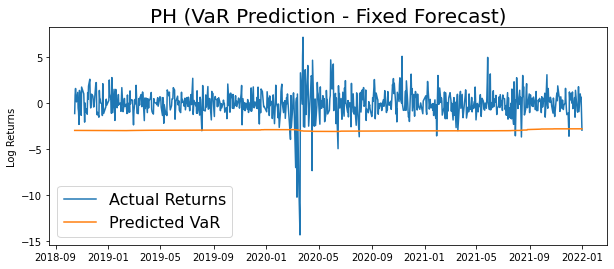

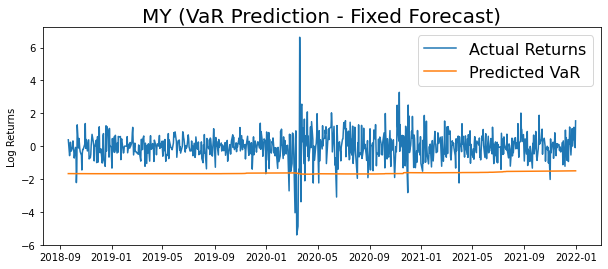

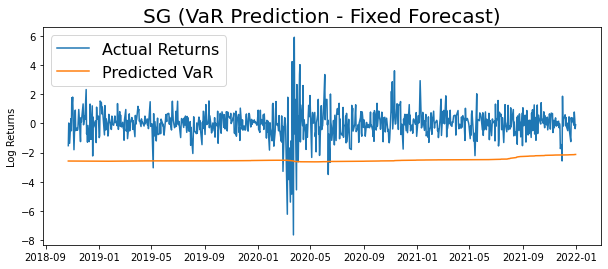

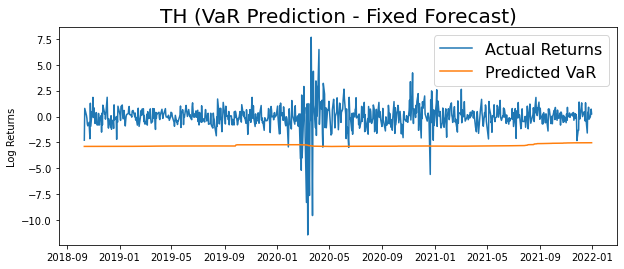

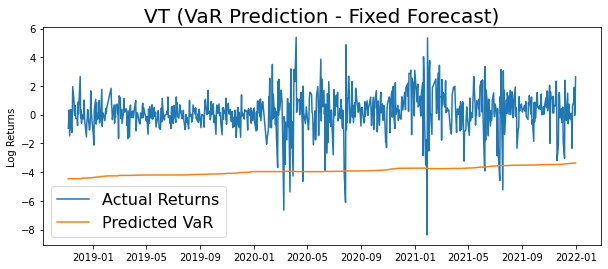

In [23]:
#Standard
#Philippines
plt.figure(figsize=(10,4))
plt.plot(PH['Returns'].iloc[:-(len(PH)-no_to_test(PH, prediction_size))])
plt.plot(-PH_fw_dn)
plt.ylabel('Log Returns')
plt.title('PH (VaR Prediction - Fixed Forecast)', fontsize=20)
plt.legend(['Actual Returns', 'Predicted VaR'], fontsize=16)

#Malaysia
plt.figure(figsize=(10,4))
plt.plot(MY['Returns'].iloc[:-(len(MY)-no_to_test(MY, prediction_size))])
plt.plot(-MY_fw_dn)
plt.ylabel('Log Returns')
plt.title('MY (VaR Prediction - Fixed Forecast)', fontsize=20)
plt.legend(['Actual Returns', 'Predicted VaR'], fontsize=16)

#Singapore
plt.figure(figsize=(10,4))
plt.plot(SG['Returns'].iloc[:-(len(SG)-no_to_test(SG, prediction_size))])
plt.plot(-SG_fw_dn)
plt.ylabel('Log Returns')
plt.title('SG (VaR Prediction - Fixed Forecast)', fontsize=20)
plt.legend(['Actual Returns', 'Predicted VaR'], fontsize=16)

#Thailand
plt.figure(figsize=(10,4))
plt.plot(TH['Returns'].iloc[:-(len(TH)-no_to_test(TH, prediction_size))])
plt.plot(-TH_fw_dn)
plt.ylabel('Log Returns')
plt.title('TH (VaR Prediction - Fixed Forecast)', fontsize=20)
plt.legend(['Actual Returns', 'Predicted VaR'], fontsize=16)

#Vietnam
plt.figure(figsize=(10,4))
plt.plot(VT['Returns'].iloc[:-(len(VT)-no_to_test(VT, prediction_size))])
plt.plot(-VT_fw_dn)
plt.ylabel('Log Returns')
plt.title('VT (VaR Prediction - Fixed Forecast)', fontsize=20)
plt.legend(['Actual Returns', 'Predicted VaR'], fontsize=16)

# Rolling Window
## Parameters

In [35]:
prediction_size = 0.2
alpha = 0.0001
name = 'RW-DN-0.01%'

In [36]:
def rolling_window(df, prediction_size, alpha):
    '''
    The function returns the (1-alpha)% d-day VaR of the asset staring at
    time t = test size to the present using a smaller time window to begin
    and gradually increasing the size
    
    PARAMETERS
    ----------
    df : pandas.DataFrame
        The data frame contains data of a chosen stock index 
        (Stock index must be arrange in DESCENDING ORDER by DATE)
    prediction_size : float
        The test size is used to create a time window to estimate VaR
        using smaller time periods (The value must be inbetween 0 to 1)
    alpha : float 
        The level of significance of the VaR
        (Assumes a value in between 0 and 1)

    RETURNS
    -------
    VaR_df : pandas.DataFrame
        The data frame contains the estimated (1-alpha)% d-day VaR from 
        time t = test size to current using the rolling time window 
    '''
    test_size = no_to_test(df, prediction_size)
    VaR_lst = np.zeros((test_size,1))
    date_df = df[:test_size].reset_index()
    date_df = date_df.filter(['Date'])
    for i in range(test_size):
        temp_df = df[test_size-i:]
        temp_VaR = get_VaR_DN(temp_df, alpha)
        VaR_lst[i] = temp_VaR
    VaR_lst = VaR_lst[::-1]
    VaR_df = pd.DataFrame(VaR_lst, columns = ['Forecasted VaR'])
    VaR_df = pd.merge(date_df, VaR_df, left_index = True, right_index = True)
    VaR_df = VaR_df.set_index('Date')
#     display(VaR_df.head(5))
    return VaR_df

#Standard
PH_rw_dn = rolling_window(PH, prediction_size, alpha)
MY_rw_dn = rolling_window(MY, prediction_size, alpha)
SG_rw_dn = rolling_window(SG, prediction_size, alpha)
TH_rw_dn = rolling_window(TH, prediction_size, alpha)
VT_rw_dn = rolling_window(VT, prediction_size, alpha)

# VaR Violation RW

In [37]:
#Philippines
PH, PH_N_rw_dn = char_function(PH, PH_rw_dn, prediction_size, name)   

#Malaysia

MY, MY_N_rw_dn = char_function(MY, MY_rw_dn, prediction_size, name)    

#Singapore

SG, SG_N_rw_dn = char_function(SG, SG_rw_dn, prediction_size, name)      

#Thailand

TH, TH_N_rw_dn = char_function(TH, TH_rw_dn, prediction_size, name)  

#Vietnam

VT, VT_N_rw_dn = char_function(VT, VT_rw_dn, prediction_size, name)  

6

7

5

6

1

# Visualization of the Rolling Window

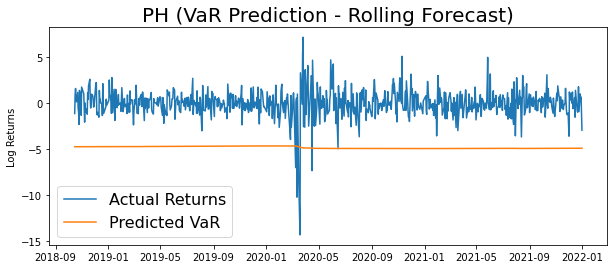

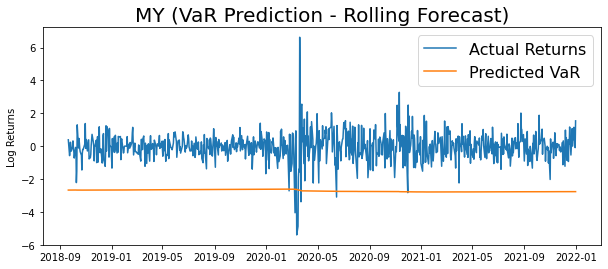

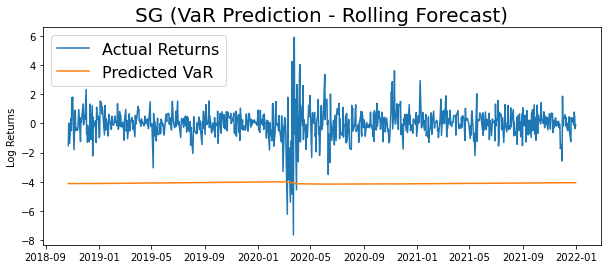

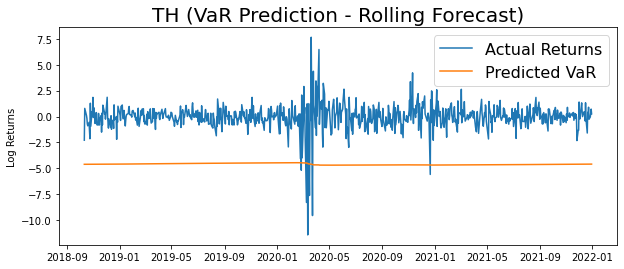

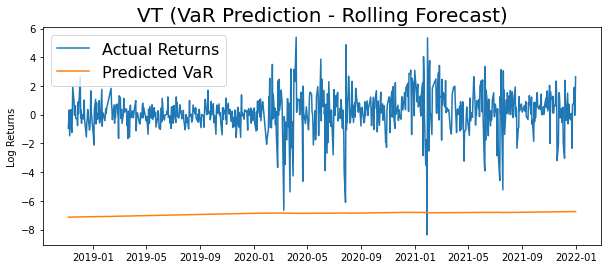

In [38]:
#Standard

#Philippines
plt.figure(figsize=(10,4))
plt.plot(PH['Returns'].iloc[:-(len(PH)-no_to_test(PH, prediction_size))])
plt.plot(-PH_rw_dn)
plt.ylabel('Log Returns')
plt.title('PH (VaR Prediction - Rolling Forecast)', fontsize=20)
plt.legend(['Actual Returns', 'Predicted VaR'], fontsize=16)

#Malaysia
plt.figure(figsize=(10,4))
plt.plot(MY['Returns'].iloc[:-(len(MY)-no_to_test(MY, prediction_size))])
plt.plot(-MY_rw_dn)
plt.ylabel('Log Returns')
plt.title('MY (VaR Prediction - Rolling Forecast)', fontsize=20)
plt.legend(['Actual Returns', 'Predicted VaR'], fontsize=16)

#Singapore
plt.figure(figsize=(10,4))
plt.plot(SG['Returns'].iloc[:-(len(SG)-no_to_test(SG, prediction_size))])
plt.plot(-SG_rw_dn)
plt.ylabel('Log Returns')
plt.title('SG (VaR Prediction - Rolling Forecast)', fontsize=20)
plt.legend(['Actual Returns', 'Predicted VaR'], fontsize=16)

#Thailand
plt.figure(figsize=(10,4))
plt.plot(TH['Returns'].iloc[:-(len(TH)-no_to_test(TH, prediction_size))])
plt.plot(-TH_rw_dn)
plt.ylabel('Log Returns')
plt.title('TH (VaR Prediction - Rolling Forecast)', fontsize=20)
plt.legend(['Actual Returns', 'Predicted VaR'], fontsize=16)

#Vietnam
plt.figure(figsize=(10,4))
plt.plot(VT['Returns'].iloc[:-(len(VT)-no_to_test(VT, prediction_size))])
plt.plot(-VT_rw_dn)
plt.ylabel('Log Returns')
plt.title('VT (VaR Prediction - Rolling Forecast)', fontsize=20)
plt.legend(['Actual Returns', 'Predicted VaR'], fontsize=16)

# Suffieincy of the Model


## Unconditional Coverage

In [30]:
def CI_UC(alpha, ss):
    '''
    The function returns an (1-alpha)% confidence interval for N
    
    PARAMETERS
    ----------
    alpha : float 
        The level of significance of the VaR
        (Assumes a value in between 0 and 1)
    ss : int
        The total number of entries in the data frame of the asset
        
    RETURNS
    -------
    CI : list
        The list is the (1-alpha)% confidence interval
    '''
    CI = []
    a = np.ceil(alpha*ss - (NormalDist().inv_cdf(1-alpha/2))*np.sqrt(ss*alpha*(1-alpha)))
    b = np.ceil(alpha*ss + (NormalDist().inv_cdf(1-alpha/2))*np.sqrt(ss*alpha*(1-alpha)))
    CI.append(a)
    CI.append(b)
    return CI

alpha = 0.01
prediction_size = 0.2

print(CI_UC(alpha,no_to_test(PH, prediction_size)))
print(CI_UC(alpha,no_to_test(MY, prediction_size)))
print(CI_UC(alpha,no_to_test(SG, prediction_size)))
print(CI_UC(alpha,no_to_test(TH, prediction_size)))
print(CI_UC(alpha,no_to_test(VT, prediction_size)))


[1.0, 15.0]
[1.0, 16.0]
[1.0, 16.0]
[1.0, 15.0]
[1.0, 16.0]


## Chi-squared Test (1 DoF)

In [ ]:
chi2.ppf(1-alpha, df = 1)

## Conditional Coverage

In [ ]:
chi2.ppf(1-alpha, df = 2)

# Parameters

In [ ]:
alpha = 0.05
name_1 = 'FW-DN-5%'
name_2 = 'RW-DN-5%'


# Kupiec Test

In [ ]:
def LR_kupiec(N, observations, alpha):
    p = alpha
    return -2*np.log((((1-p)**(observations - N))*(p**N))/(((1-N/observations)**(observations - N))*((N/observations)**N)))

alpha = 0.05 
entries1 = no_to_test(PH, prediction_size)
entries2 = no_to_test(MY, prediction_size)
entries3 = no_to_test(SG, prediction_size)
entries4 = no_to_test(TH, prediction_size)
entries5 = no_to_test(VT, prediction_size)

#Philippines
PH_LRk_fw_dn = LR_kupiec(PH_N_fw_dn, entries1, alpha)
PH_LRk_rw_dn = LR_kupiec(PH_N_rw_dn, entries1, alpha)

#Malaysia
MY_LRk_fw_dn = LR_kupiec(MY_N_fw_dn, entries2, alpha)
MY_LRk_rw_dn = LR_kupiec(MY_N_rw_dn, entries2, alpha)

#Singapore
SG_LRk_fw_dn = LR_kupiec(SG_N_fw_dn, entries3, alpha)
SG_LRk_rw_dn = LR_kupiec(SG_N_rw_dn, entries3, alpha)

#Thailand
TH_LRk_fw_dn = LR_kupiec(TH_N_fw_dn, entries4, alpha)
TH_LRk_rw_dn = LR_kupiec(TH_N_rw_dn, entries4, alpha)

#Thailand
VT_LRk_fw_dn = LR_kupiec(VT_N_fw_dn, entries5, alpha)
VT_LRk_rw_dn = LR_kupiec(VT_N_rw_dn, entries5, alpha)

# Christoffersen Test
## Part 1

In [ ]:
def no_of_periods(df, name):
    n00 = 0
    n01 = 0
    n10 = 0
    n11 = 0
    violations = df[name].dropna()[::-1]
    v_p = violations[0]
    i = 1
    while i < len(violations):
        if v_p == violations[i] and v_p == 0:
            n00 += 1
        elif v_p != violations[i] and v_p == 0:
            n01 += 1
        elif v_p != violations[i] and v_p == 1:
            n10 += 1
        else:
            n11 += 1
        v_p = violations[i]
        i += 1 
    return n00, n01, n10, n11


#Philippines
PH_n00_fw_dn, PH_n01_fw_dn, PH_n10_fw_dn, PH_n11_fw_dn = no_of_periods(PH, name_1)
PH_n00_rw_dn, PH_n01_rw_dn, PH_n10_rw_dn, PH_n11_rw_dn = no_of_periods(PH, name_2)

#Malaysia
MY_n00_fw_dn, MY_n01_fw_dn, MY_n10_fw_dn, MY_n11_fw_dn = no_of_periods(MY, name_1)
MY_n00_rw_dn, MY_n01_rw_dn, MY_n10_rw_dn, MY_n11_rw_dn = no_of_periods(MY, name_2)

#Singapore
SG_n00_fw_dn, SG_n01_fw_dn, SG_n10_fw_dn, SG_n11_fw_dn = no_of_periods(SG, name_1)
SG_n00_rw_dn, SG_n01_rw_dn, SG_n10_rw_dn, SG_n11_rw_dn = no_of_periods(SG, name_2)

#Thailand
TH_n00_fw_dn, TH_n01_fw_dn, TH_n10_fw_dn, TH_n11_fw_dn = no_of_periods(TH, name_1)
TH_n00_rw_dn, TH_n01_rw_dn, TH_n10_rw_dn, TH_n11_rw_dn = no_of_periods(TH, name_2)

#Vietnam
VT_n00_fw_dn, VT_n01_fw_dn, VT_n10_fw_dn, VT_n11_fw_dn = no_of_periods(VT, name_1)
VT_n00_rw_dn, VT_n01_rw_dn, VT_n10_rw_dn, VT_n11_rw_dn = no_of_periods(VT, name_2)

## Part 2

In [ ]:
def LR_ind(df, name, LR_pof):
    n00, n01, n10, n11 = no_of_periods(df, name)
    pi_0 = n01/(n00+n01)
    pi_1 = n11/(n10+n11)
    pi = (n01+n11)/(n00+n01+n10+n11)
    LR_ind = -2*np.log((((1-pi)**(n00+n01))*(pi**(n01+n11)))/(((1-pi_0)**n00)*(pi_0**n01)*((1-pi_1)**n10)*(pi_1**n11)))
    LR_cc = LR_ind+LR_pof
    display(LR_cc)
    return LR_ind, LR_cc

#Philippines
PH_LRcci_fw_dn, PH_LRcc_fw_dn = LR_ind(PH, name_1, PH_LRk_fw_dn)
PH_LRcci_rw_dn, PH_LRcc_rw_dn = LR_ind(PH, name_2, PH_LRk_rw_dn)

#Malaysia
MY_LRcci_fw_dn, MY_LRcc_fw_dn = LR_ind(MY, name_1, MY_LRk_fw_dn)
MY_LRcci_rw_dn, MY_LRcc_rw_dn = LR_ind(MY, name_2, MY_LRk_rw_dn)

#Singapore
SG_LRcci_fw_dn,SG_LRcc_fw_dn = LR_ind(SG, name_1, SG_LRk_fw_dn)
SG_LRcci_rw_dn,SG_LRcc_rw_dn = LR_ind(SG, name_2, SG_LRk_rw_dn)

#Thailand
TH_LRcci_fw_dn,TH_LRcc_fw_dn = LR_ind(TH, name_1, TH_LRk_fw_dn)
TH_LRcci_rw_dn,TH_LRcc_rw_dn = LR_ind(TH, name_2, TH_LRk_rw_dn)

#Vietnam
VT_LRcci_fw_dn,VT_LRcc_fw_dn = LR_ind(VT, name_1, VT_LRk_fw_dn)
VT_LRcci_rw_dn,VT_LRcc_rw_dn = LR_ind(VT, name_2, VT_LRk_rw_dn)